**Exercise 4**
==============

<font size="4px">Generator class for the GAN
</font>

In [3]:
import torch.nn as nn

# You can copy this code to your personal pipeline project or execute it here.
class Generator(nn.Module):
    """
    Generator class for the GAN
    """

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

**Exercise 5**
==============

<font size="4px">Discriminator class for the GAN
</font>

In [4]:
import torch.nn as nn

# You can copy this code to your personal pipeline project or execute it here.
class Discriminator(nn.Module):
    """
    Discriminator class for the GAN
    """
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

**Exercise 6**
==============

<font size="4px">The method trains a Generative Adversarial Network and is based on:
<https://realpython.com/generative-adversarial-networks/>

The Generator network tries to generate convincing images of handwritten
digits. The Discriminator needs to detect if the image was created by
the Generater or if the image is a real image from a known dataset
(MNIST). If both the Generator and the Discriminator are optimized, the
Generator is able to create images that are difficult to distinguish
from real images. This is goal of a GAN.

This code produces the expected results at first attempt at about 50
epochs.

param batch\_size  
The number of images to train in one epoch.

param num\_epochs  
The number of epochs to train the gan.

param device  
The computing device to use. If CUDA is installed and working then <span
class="title-ref">cuda:0</span> is chosen otherwise 'cpu' is chosen.
Note: Training a GAN on the CPU is very slow.

**This method is part of a series of debugging exercises.** **Each
Python method of this series contains bug that needs to be found.**

It contains at least two bugs: one structural bug and one cosmetic bug.
Both bugs are from the original tutorial.

`1   Changing the batch_size from 32 to 64 triggers the structural bug.`  
`2   Can you also spot the cosmetic bug?`  
`Note: to fix this bug a thorough understanding of GANs is not necessary.`

Change the batch size to 64 to trigger the bug with message: ValueError:
"Using a target size (torch.Size(\[128, 1\])) that is different to the
input size (torch.Size(\[96, 1\])) is deprecated. Please ensure they
have the same size."
</font>

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

# You can copy this code to your personal pipeline project or execute it here.
def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):
    """
    The method trains a Generative Adversarial Network and is based on:
    https://realpython.com/generative-adversarial-networks/

    The Generator network tries to generate convincing images of handwritten digits.
    The Discriminator needs to detect if the image was created by the Generater or if the image is a real image from
    a known dataset (MNIST).
    If both the Generator and the Discriminator are optimized, the Generator is able to create images that are difficult
    to distinguish from real images. This is goal of a GAN.

    This code produces the expected results at first attempt at about 50 epochs.

    :param batch_size: The number of images to train in one epoch.
    :param num_epochs: The number of epochs to train the gan.
    :param device: The computing device to use. If CUDA is installed and working then `cuda:0` is chosen
        otherwise 'cpu' is chosen. Note: Training a GAN on the CPU is very slow.

    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    It contains at least two bugs: one structural bug and one cosmetic bug. Both bugs are from the original tutorial.

    | ``1   Changing the batch_size from 32 to 64 triggers the structural bug.``
    | ``2   Can you also spot the cosmetic bug?``
    | ``Note: to fix this bug a thorough understanding of GANs is not necessary.``

    Change the batch size to 64 to trigger the bug with message:
    ValueError: "Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size."

    >>> train_gan(batch_size=32, num_epochs=100)
    """
    # Add/adjust code.

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    try:
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    except:
        print("Failed to download MNIST, retrying with different URL")
        # source: https://www.gitmemory.com/issue/pytorch/vision/3549/797000687
        # also see: https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    # example data
    real_samples, mnist_labels = next(iter(train_loader))

    fig = plt.figure()
    for i in range(16):
        sub = fig.add_subplot(4, 4, 1 + i)
        sub.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
        sub.axis('off')

    fig.tight_layout()
    fig.suptitle("Real images")
    display(fig)

    time.sleep(5)

    # Set up training
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
    lr = 0.0001
    loss_function = nn.BCELoss()
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    # train
    for epoch in range(num_epochs):
        for n, (real_samples, mnist_labels) in enumerate(train_loader):

            # Data for training the discriminator
            real_samples = real_samples.to(device=device)
            real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
            generated_samples = generator(latent_space_samples)
            generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

            # Data for training the generator
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss and samples generated
            if n == batch_size - 1:
                name = f"Generate images\n Epoch: {epoch} Loss D.: {loss_discriminator:.2f} Loss G.: {loss_generator:.2f}"
                generated_samples = generated_samples.detach().cpu().numpy()
                fig = plt.figure()
                for i in range(16):
                    sub = fig.add_subplot(4, 4, 1 + i)
                    sub.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
                    sub.axis('off')
                fig.suptitle(name)
                fig.tight_layout()
                clear_output(wait=False)
                display(fig)


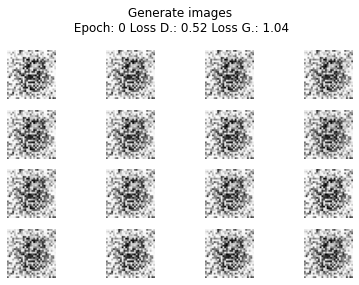

ValueError: Target and input must have the same number of elements. target nelement (128) != input nelement (96)

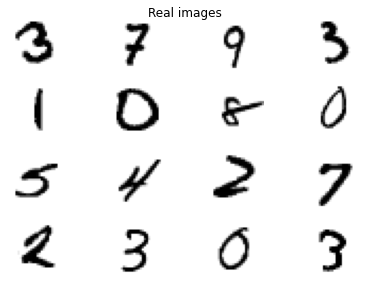

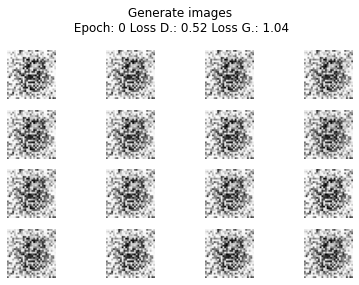

In [8]:
train_gan(batch_size=64, num_epochs=1)

# https://pytorch.org/docs/stable/data.html